# Multiple Linear Regression## Bike Sharing  Case Study
#### 
Problem Statemt:

To model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features.
Essentially, the company wants —

- Which variables are significant in predicting the demand for shared bikes.
  
- How well those variables describe the bike demands
hn is important!

## Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the housing dataset

In [562]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [564]:
import numpy as np
import pandas as pd

In [566]:
bikeSharing = pd.read_csv("day.csv")

In [568]:
# Check the head of the dataset
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [570]:
bikeSharing.shape

(730, 16)

In [572]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [574]:
bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [576]:
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Data Handling and cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Deleting the duplicated entries
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [580]:
# Defining the map function for season
def season_map(x):
  """Maps a season number to its name."""
  seasons = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
  return seasons.get(x)  # Use get() to handle potential missing values

bikeSharing['season']=bikeSharing['season'].apply(season_map)

In [582]:
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [584]:
# Defining the map function for weathersit
def weathersit_map(x):
  """Maps a weathersit number to its name."""
  weathersit = {1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'}
  return weathersit.get(x)  # Use get() to handle potential missing values

bikeSharing['weathersit']=bikeSharing['weathersit'].apply(weathersit_map)

In [586]:
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [588]:
# Defining the map function for weathersit
def mnth_map(x):
  """Maps a mnth number to its name."""
  mnth = {1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr',5: 'may', 6: 'jun', 7: 'jul', 8: 'aug',9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'}
  return mnth.get(x)  # Use get() to handle potential missing values

bikeSharing['mnth']=bikeSharing['mnth'].apply(mnth_map)

In [590]:
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Derived variable 
#### Range	Celsius (°C)
   - Low	Below 15°C
   - Medium	15°C - 25°C
   - High	Above 25°C
#### Humidity Range
  - Below 30 low
  - 30-50 Ideal
  - Above 50 High

In [593]:
# Deriving Categorical variable for temp and atemp
def categorize_temperature(temp):
    """Categorizes temperature into low, medium, and high ranges."""
    bins = [float('-inf'), 15, 25, float('inf')]
    labels = ['low', 'medium', 'high']
    return pd.cut(temp, bins=bins, labels=labels)

bikeSharing['temp_range'] = categorize_temperature(bikeSharing['temp'])

In [595]:
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_range
0,1,01-01-2018,spring,0,jan,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,low
1,2,02-01-2018,spring,0,jan,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,low
2,3,03-01-2018,spring,0,jan,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,low
3,4,04-01-2018,spring,0,jan,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,low
4,5,05-01-2018,spring,0,jan,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,low


In [597]:
# Deriving Categorical variable for humidity
def categorize_humidity(humid):
    """Categorizes humidity into low, ideal, and high ranges."""
    bins = [float('-inf'), 30, 50, float('inf')]
    labels = ['low', 'ideal', 'high']
    return pd.cut(humid, bins=bins, labels=labels)

bikeSharing['humid_range'] = categorize_humidity(bikeSharing['hum'])

In [599]:
# Remove columns which haveno use for modeling
bikeSharing.drop(columns=['instant', 'atemp', 'casual', 'registered'], axis=1, inplace=True) 
bikeSharing.shape

(730, 14)

In [601]:
# Deriving Categorical variable for windspeed
def categorize_windspeed(wind):
    """Categorizes windSpeed into light, medium, and strong ranges."""
    bins = [float('-inf'), 8, 24, float('inf')]
    labels = ['light', 'medium', 'strong']
    return pd.cut(wind, bins=bins, labels=labels)

bikeSharing['wind_range'] = categorize_windspeed(bikeSharing['windspeed'])

In [603]:
# Remove columns which have no use for modeling
#bikeSharing.drop(columns=['windspeed'], axis=1, inplace=True)
bikeSharing.shape

(730, 15)

In [605]:
#Drop dteday
bikeSharing.drop(columns=['dteday'], axis=1, inplace=True) 
bikeSharing.shape

(730, 14)

In [607]:
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,temp_range,humid_range,wind_range
0,spring,0,jan,0,6,0,mist,14.110847,80.5833,10.749882,985,low,high,medium
1,spring,0,jan,0,0,0,mist,14.902598,69.6087,16.652113,801,low,high,medium
2,spring,0,jan,0,1,1,clear,8.050924,43.7273,16.636703,1349,low,ideal,medium
3,spring,0,jan,0,2,1,clear,8.200000,59.0435,10.739832,1562,low,high,medium
4,spring,0,jan,0,3,1,clear,9.305237,43.6957,12.522300,1600,low,ideal,medium


## Step 3: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

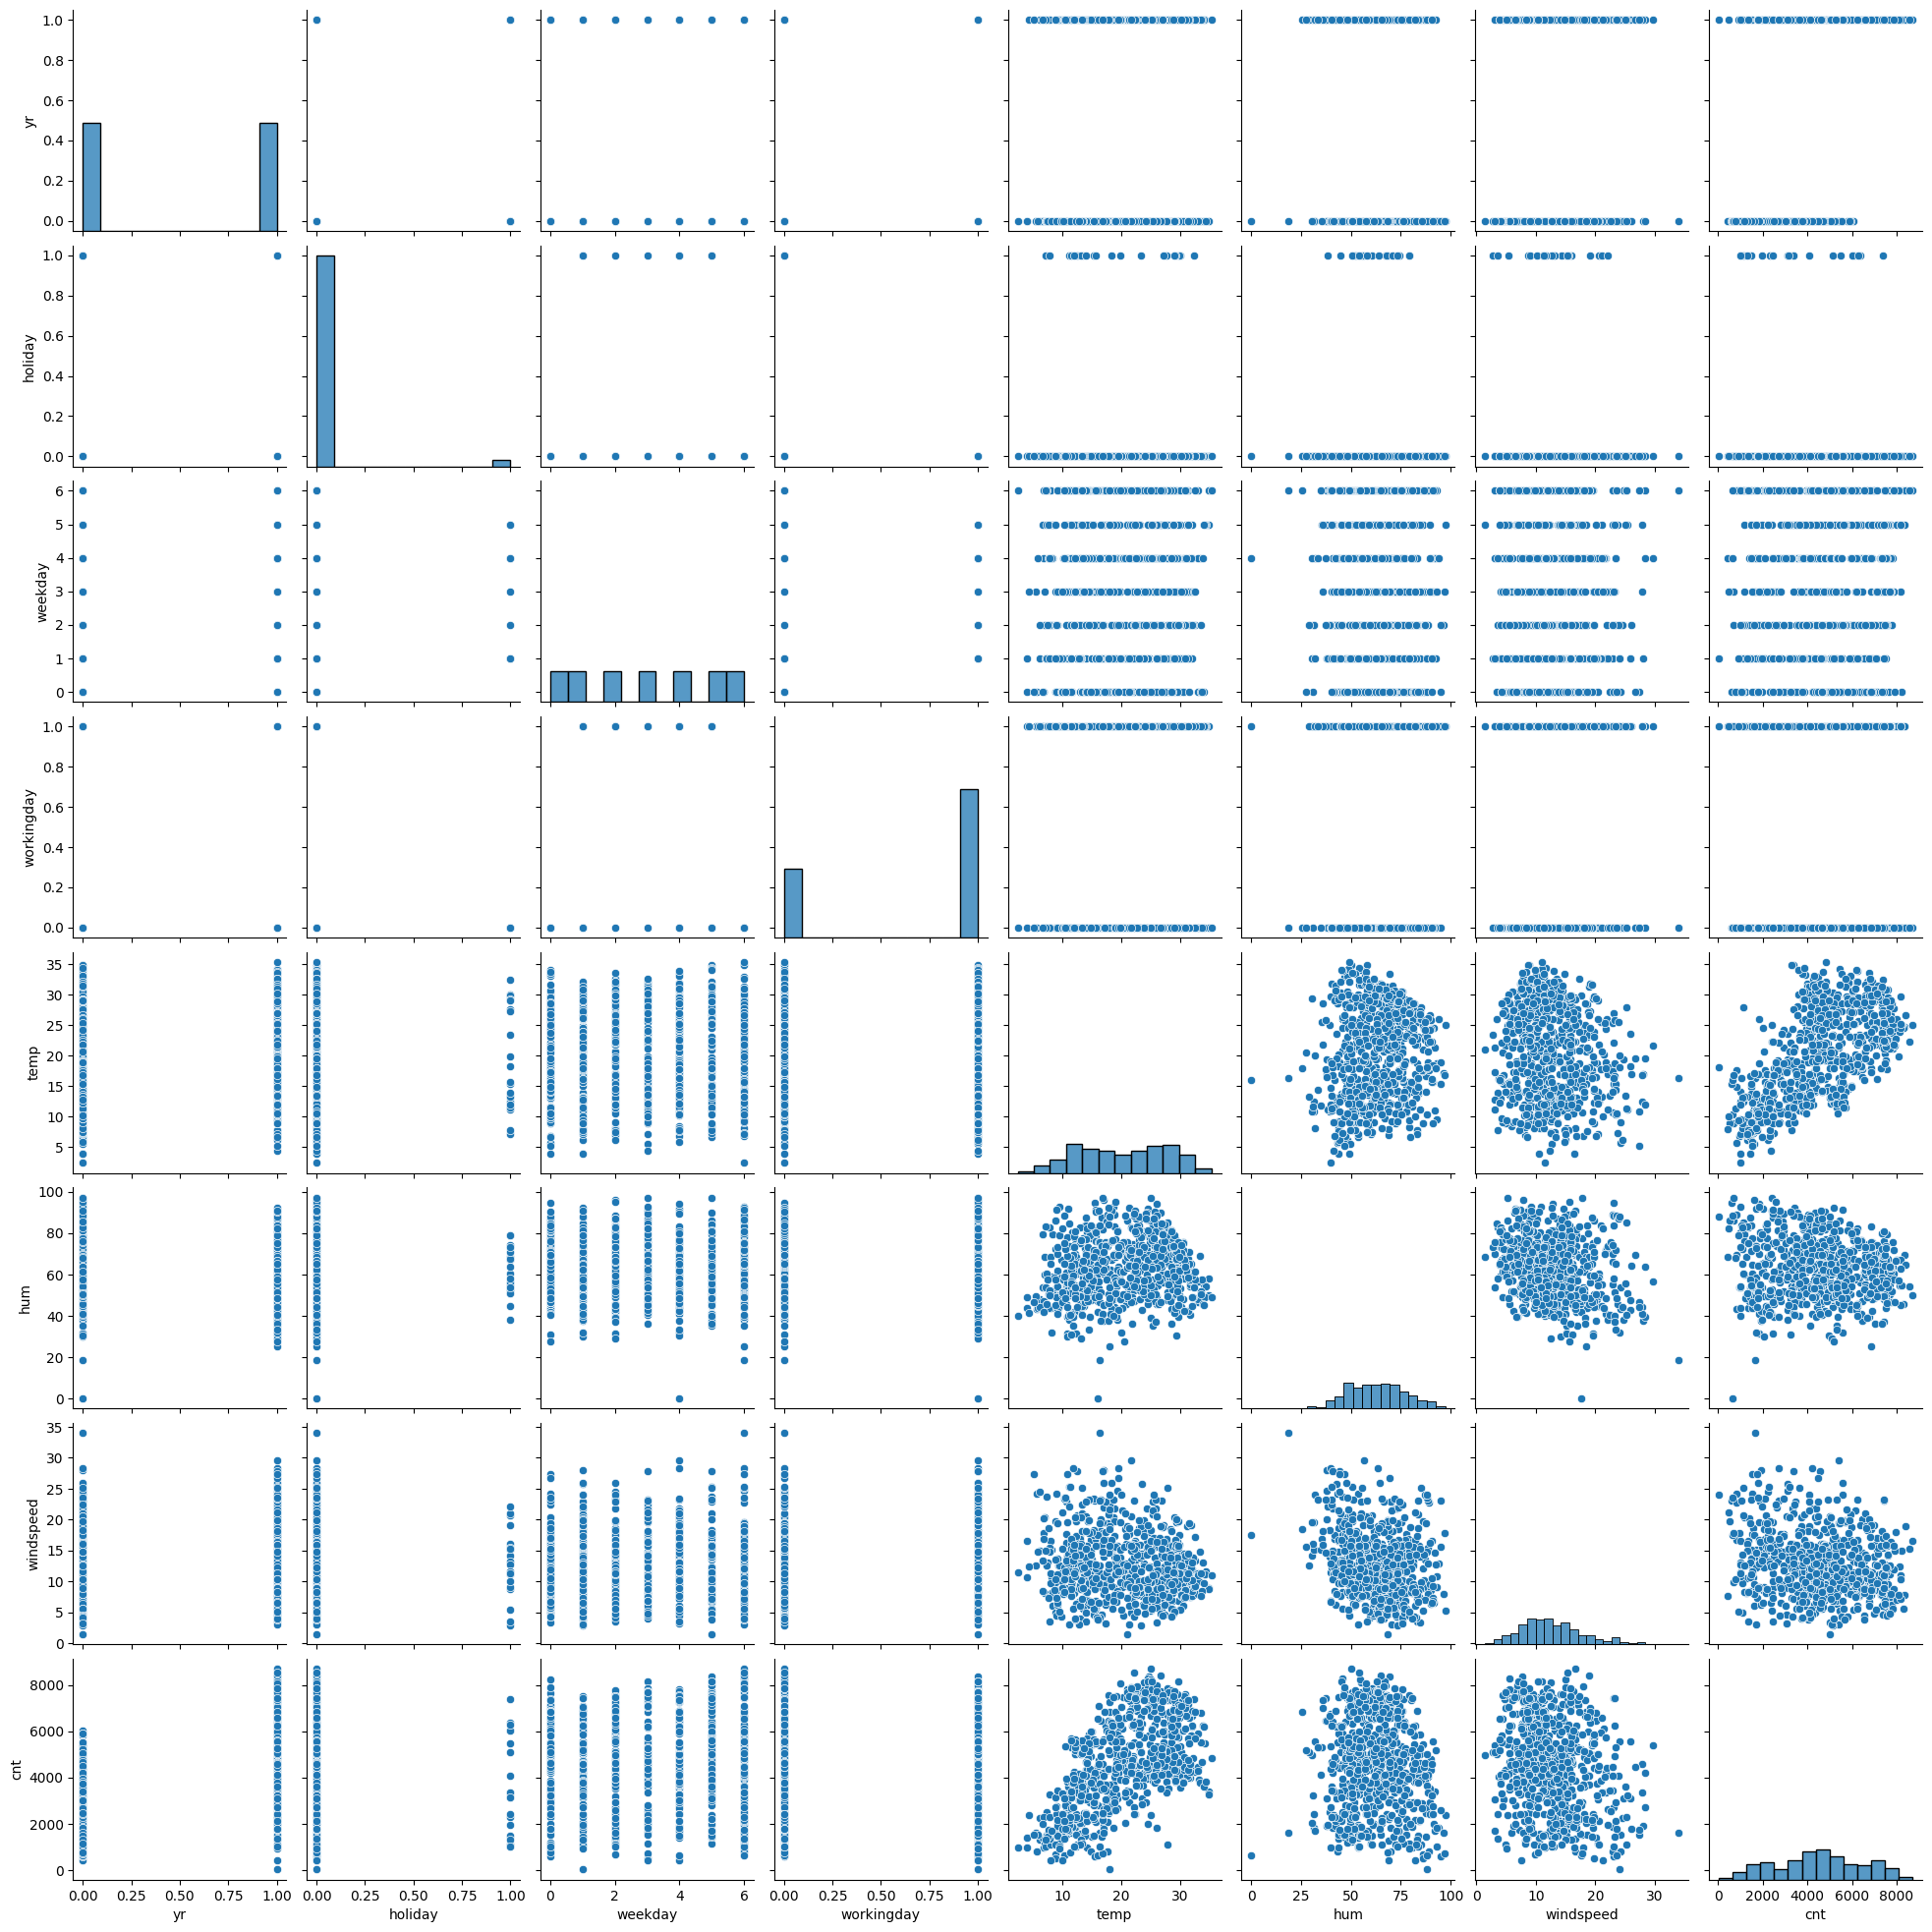

In [611]:
sns.pairplot(bikeSharing)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

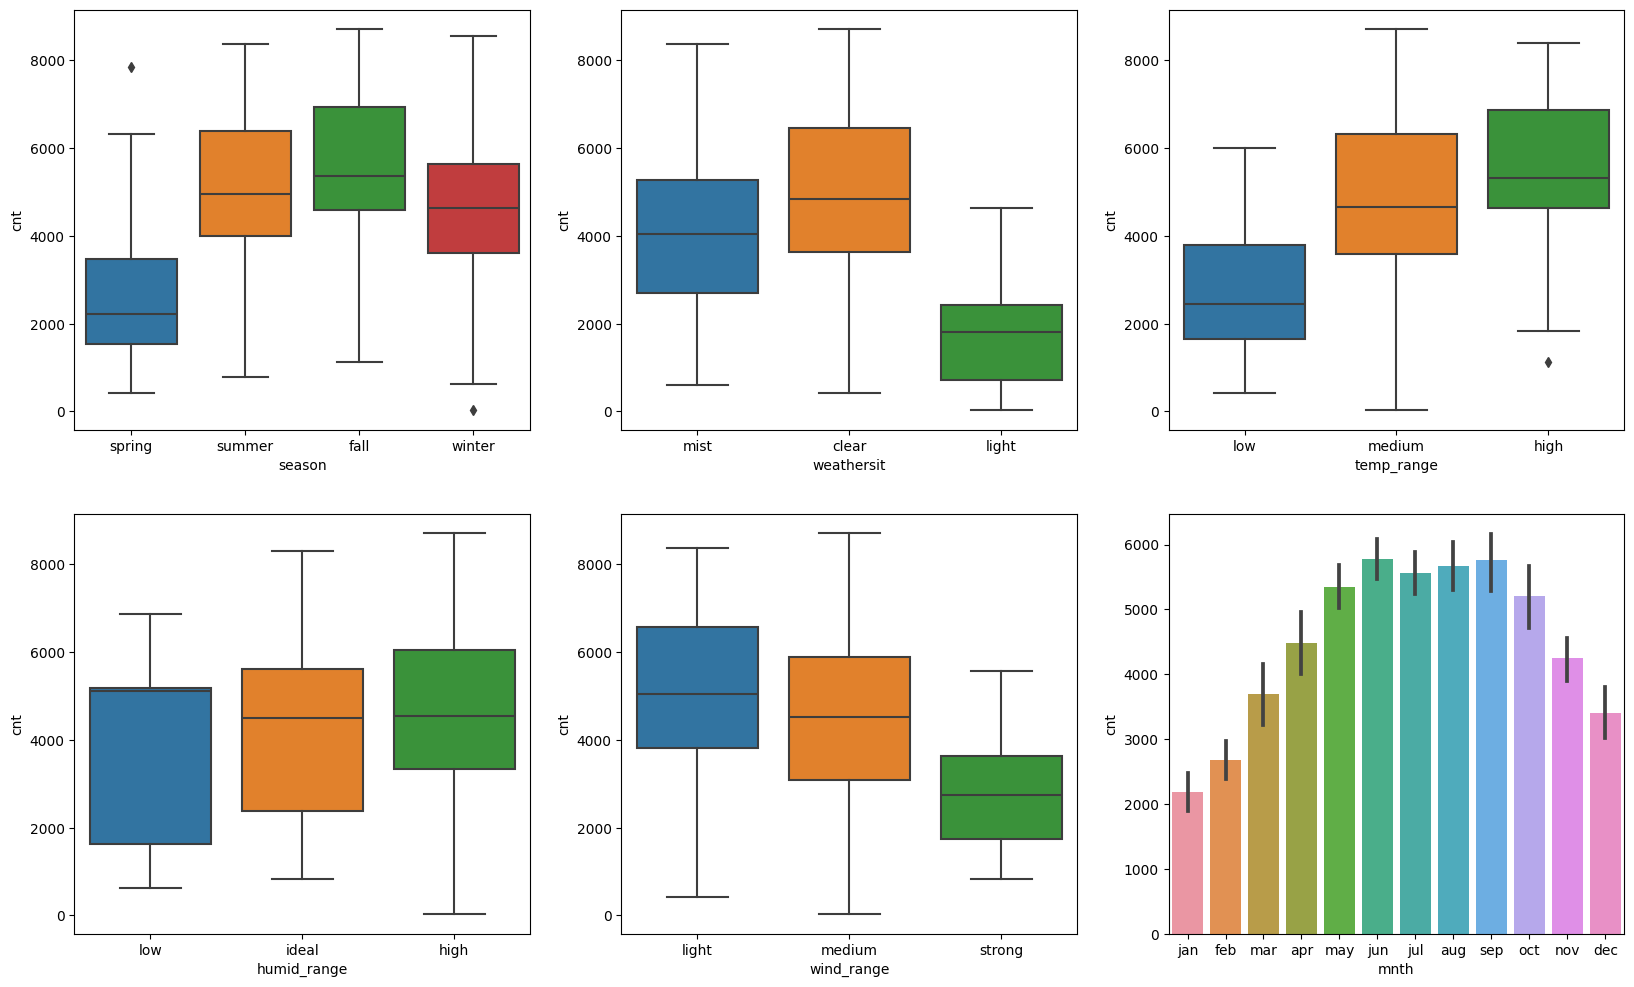

In [613]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeSharing)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeSharing)
plt.subplot(2,3,3)
sns.boxplot(x = 'temp_range', y = 'cnt', data = bikeSharing)
plt.subplot(2,3,4)
sns.boxplot(x = 'humid_range', y = 'cnt', data = bikeSharing)
plt.subplot(2,3,5)
sns.boxplot(x = 'wind_range', y = 'cnt', data = bikeSharing)
plt.subplot(2,3,6)
sns.barplot(x = 'mnth', y = 'cnt', data = bikeSharing)
plt.show()

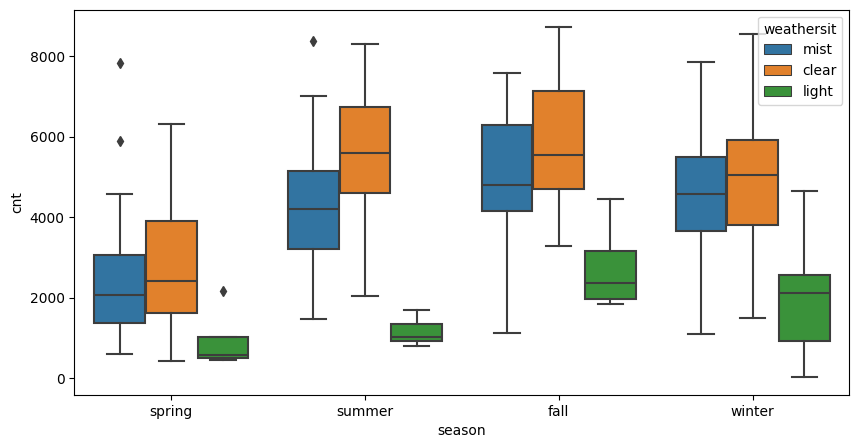

In [614]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = bikeSharing)
plt.show()

In [615]:
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,temp_range,humid_range,wind_range
0,spring,0,jan,0,6,0,mist,14.110847,80.5833,10.749882,985,low,high,medium
1,spring,0,jan,0,0,0,mist,14.902598,69.6087,16.652113,801,low,high,medium
2,spring,0,jan,0,1,1,clear,8.050924,43.7273,16.636703,1349,low,ideal,medium
3,spring,0,jan,0,2,1,clear,8.200000,59.0435,10.739832,1562,low,high,medium
4,spring,0,jan,0,3,1,clear,9.305237,43.6957,12.522300,1600,low,ideal,medium


### Dummy Variables

The variable `weathersit` has three levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [622]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weather'
weather = pd.get_dummies(bikeSharing['weathersit'])

In [624]:
# Check what the dataset 'weather' looks like
weather.head()

,clear,light,mist
0,False,False,True
1,False,False,True
2,True,False,False
3,True,False,False
4,True,False,False


Now, you don't need three columns. You can drop the clear column, as the type of weather can be identified with just the last two columns where —

- `False False` will correspond to `clear`
- `True False` will correspond to `light`
- `False True` will correspond to `mist`

In [627]:
# Let's drop the first column from status df using 'drop_first = True'

weather = pd.get_dummies(bikeSharing['weathersit'], drop_first = True)

In [629]:
# Add the results to the original bikeSharing dataframe

bikeSharing = pd.concat([bikeSharing, weather], axis = 1)

In [631]:
# Now let's see the head of our dataframe.

bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,temp_range,humid_range,wind_range,light,mist
0,spring,0,jan,0,6,0,mist,14.110847,80.5833,10.749882,985,low,high,medium,False,True
1,spring,0,jan,0,0,0,mist,14.902598,69.6087,16.652113,801,low,high,medium,False,True
2,spring,0,jan,0,1,1,clear,8.050924,43.7273,16.636703,1349,low,ideal,medium,False,False
3,spring,0,jan,0,2,1,clear,8.200000,59.0435,10.739832,1562,low,high,medium,False,False
4,spring,0,jan,0,3,1,clear,9.305237,43.6957,12.522300,1600,low,ideal,medium,False,False


In [632]:
# Drop 'weathersit' as we have created the dummies for it

bikeSharing.drop(['weathersit'], axis = 1, inplace = True)

In [635]:
# Rename a column
bikeSharing = bikeSharing.rename(columns={'light': 'light_weather'})
bikeSharing = bikeSharing.rename(columns={'mist': 'mist_weather'})

In [637]:
#creating new df for modeling
bikeSharing.drop(['temp_range','wind_range','humid_range'], axis = 1, inplace = True)

In [639]:
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,light_weather,mist_weather
0,spring,0,jan,0,6,0,14.110847,80.5833,10.749882,985,False,True
1,spring,0,jan,0,0,0,14.902598,69.6087,16.652113,801,False,True
2,spring,0,jan,0,1,1,8.050924,43.7273,16.636703,1349,False,False
3,spring,0,jan,0,2,1,8.200000,59.0435,10.739832,1562,False,False
4,spring,0,jan,0,3,1,9.305237,43.6957,12.522300,1600,False,False


In [641]:
season = pd.get_dummies(bikeSharing['season'])
season.head()

,fall,spring,summer,winter
0,False,True,False,False
1,False,True,False,False
2,False,True,False,False
3,False,True,False,False
4,False,True,False,False


In [643]:
season = pd.get_dummies(bikeSharing['season'], drop_first = True)

In [645]:
bikeSharing.drop(['season'], axis = 1, inplace = True)

In [647]:
# Add the results to the original bikeSharing dataframe
bikeSharing = pd.concat([bikeSharing, season], axis = 1)

# Rename a column
bikeSharing = bikeSharing.rename(columns={'spring': 'spring_season'})
bikeSharing = bikeSharing.rename(columns={'summer': 'summer_season'})
bikeSharing = bikeSharing.rename(columns={'winter': 'winter_season'})

Now,changed True false to o and 1 —

- `00` will correspond to `clear`
- `10` will correspond to `light`
- `01` will correspond to `mist`

In [650]:
# Defining the map function for light_weather
def map(x):
  weatherMap = {False: 0, True: 1}
  return weatherMap.get(x)  # Use get() to handle potential missing values
    
bikeSharing['spring_season']=bikeSharing['spring_season'].apply(map)
bikeSharing['summer_season']=bikeSharing['summer_season'].apply(map)
bikeSharing['winter_season']=bikeSharing['winter_season'].apply(map)
bikeSharing['light_weather']=bikeSharing['light_weather'].apply(map)
bikeSharing['mist_weather']=bikeSharing['mist_weather'].apply(map)

In [652]:
bikeSharing.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,light_weather,mist_weather,spring_season,summer_season,winter_season
0,0,jan,0,6,0,14.110847,80.5833,10.749882,985,0,1,1,0,0
1,0,jan,0,0,0,14.902598,69.6087,16.652113,801,0,1,1,0,0
2,0,jan,0,1,1,8.050924,43.7273,16.636703,1349,0,0,1,0,0
3,0,jan,0,2,1,8.200000,59.0435,10.739832,1562,0,0,1,0,0
4,0,jan,0,3,1,9.305237,43.6957,12.522300,1600,0,0,1,0,0


In [654]:
#Get dummies for mnth
mnth = pd.get_dummies(bikeSharing['mnth'])
mnth.head()

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False


In [656]:
mnth = pd.get_dummies(bikeSharing['mnth'], drop_first = True)

In [658]:
bikeSharing.drop(['mnth'], axis = 1, inplace = True)

In [660]:
# Add the results to the original bikeSharing dataframe
bikeSharing = pd.concat([bikeSharing, mnth], axis = 1)
bikeSharing.head()

,yr,holiday,weekday,workingday,temp,hum,windspeed,cnt,light_weather,mist_weather,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,6,0,14.110847,80.5833,10.749882,985,0,1,...,False,False,True,False,False,False,False,False,False,False
1,0,0,0,0,14.902598,69.6087,16.652113,801,0,1,...,False,False,True,False,False,False,False,False,False,False
2,0,0,1,1,8.050924,43.7273,16.636703,1349,0,0,...,False,False,True,False,False,False,False,False,False,False
3,0,0,2,1,8.200000,59.0435,10.739832,1562,0,0,...,False,False,True,False,False,False,False,False,False,False
4,0,0,3,1,9.305237,43.6957,12.522300,1600,0,0,...,False,False,True,False,False,False,False,False,False,False


In [662]:
bikeSharing['jan']=bikeSharing['jan'].apply(map)
bikeSharing['feb']=bikeSharing['feb'].apply(map)
bikeSharing['mar']=bikeSharing['mar'].apply(map)
bikeSharing['may']=bikeSharing['may'].apply(map)
bikeSharing['jun']=bikeSharing['jun'].apply(map)
bikeSharing['jul']=bikeSharing['jul'].apply(map)
bikeSharing['aug']=bikeSharing['aug'].apply(map)
bikeSharing['sep']=bikeSharing['sep'].apply(map)
bikeSharing['oct']=bikeSharing['oct'].apply(map)
bikeSharing['nov']=bikeSharing['nov'].apply(map)
bikeSharing['dec']=bikeSharing['dec'].apply(map)

In [664]:
bikeSharing.head()

,yr,holiday,weekday,workingday,temp,hum,windspeed,cnt,light_weather,mist_weather,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,6,0,14.110847,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,14.902598,69.6087,16.652113,801,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,43.6957,12.522300,1600,0,0,...,0,0,1,0,0,0,0,0,0,0


In [666]:
#After seeing the barplot of month and cnt we can drop some columns
bikeSharing = bikeSharing.drop(["dec", "feb", "jan","mar","oct","nov","dec"], axis = 1)
bikeSharing.head()

,yr,holiday,weekday,workingday,temp,hum,windspeed,cnt,light_weather,mist_weather,spring_season,summer_season,winter_season,aug,jul,jun,may,sep
0,0,0,6,0,14.110847,80.5833,10.749882,985,0,1,1,0,0,0,0,0,0,0
1,0,0,0,0,14.902598,69.6087,16.652113,801,0,1,1,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,43.7273,16.636703,1349,0,0,1,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,59.0435,10.739832,1562,0,0,1,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,43.6957,12.522300,1600,0,0,1,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [669]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikeSharing, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [672]:
from sklearn.preprocessing import MinMaxScaler

In [674]:
scaler = MinMaxScaler()

In [676]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['yr', 'temp', 'hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [678]:
df_train.head()

,yr,holiday,weekday,workingday,temp,hum,windspeed,cnt,light_weather,mist_weather,spring_season,summer_season,winter_season,aug,jul,jun,may,sep
653,1.0,0,2,1,0.509887,0.575354,0.300794,0.864243,0,0,0,0,1,0,0,0,0,0
576,1.0,0,2,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,1,0,0,0
426,1.0,0,6,0,0.442393,0.640189,0.255342,0.465255,0,1,1,0,0,0,0,0,0,0
728,1.0,0,0,0,0.245101,0.498067,0.663106,0.204096,0,0,1,0,0,0,0,0,0,0
482,1.0,0,6,0,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0,0,0,0,0,0


In [680]:
df_train.describe()

,yr,holiday,weekday,workingday,temp,hum,windspeed,cnt,light_weather,mist_weather,spring_season,summer_season,winter_season,aug,jul,jun,may,sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,2.990196,0.676471,0.537262,0.650369,0.320768,0.513620,0.029412,0.343137,0.243137,0.245098,0.24902,0.096078,0.076471,0.074510,0.084314,0.080392
std,0.500429,0.157763,2.017093,0.468282,0.225844,0.145882,0.169797,0.224593,0.169124,0.475223,0.429398,0.430568,0.43287,0.294988,0.266010,0.262857,0.278131,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,3.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,5.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


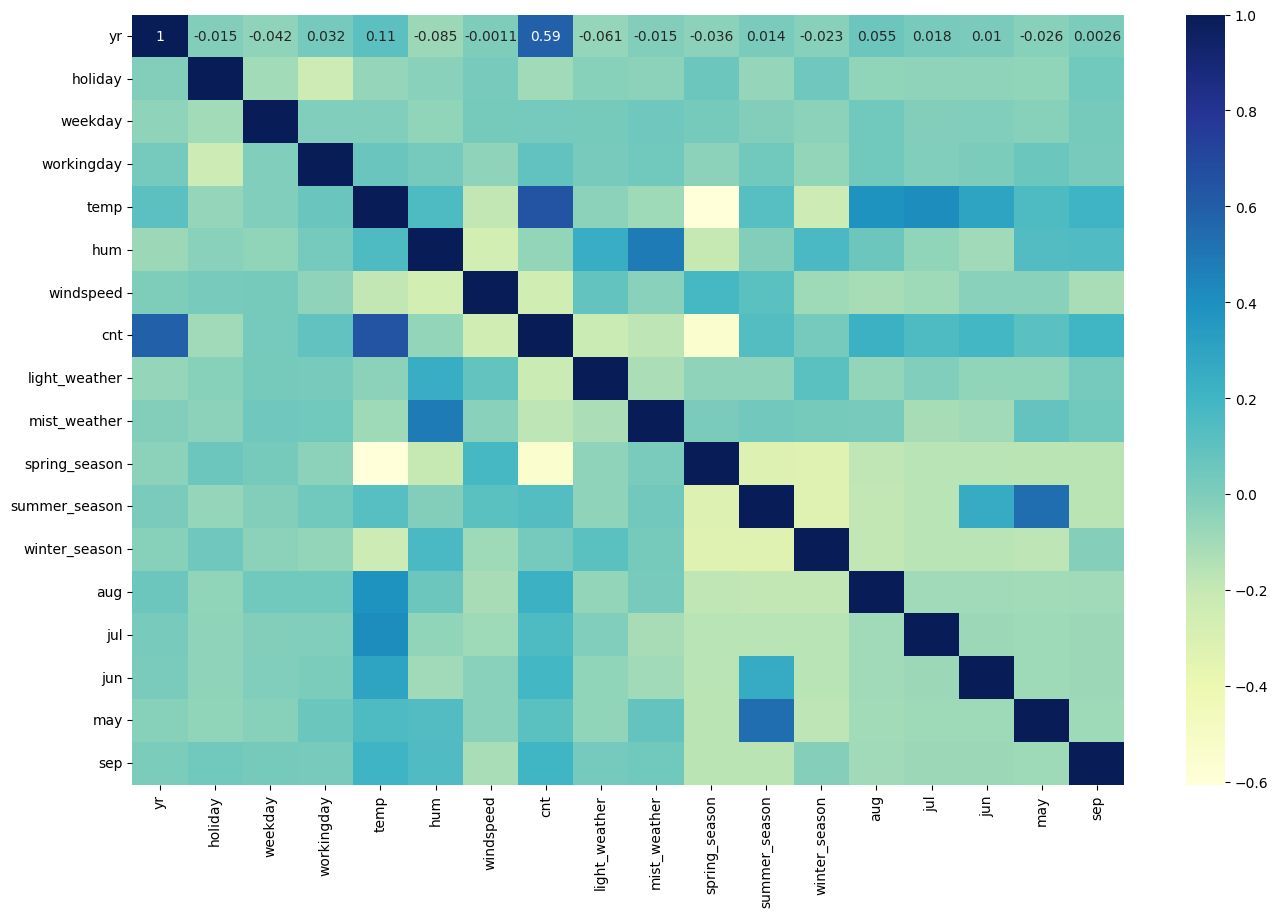

In [682]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

 have noticed, atemp seems to the correlated to cnt the most. Let's see a pairplot for high_temp vs cnt.

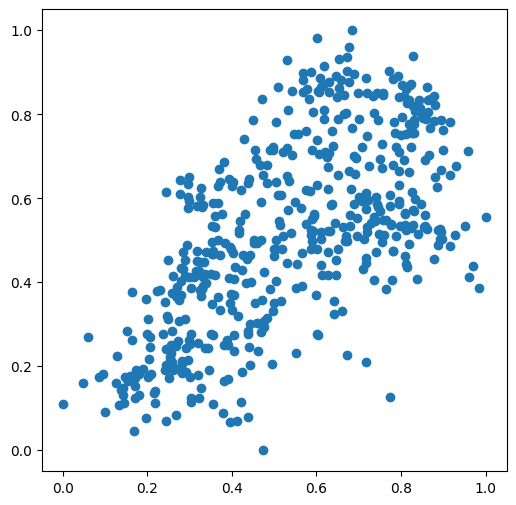

In [685]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

So, we pick atemp as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [689]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [692]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [694]:
# Check the parameters obtained

lr.params

const    0.169798
temp     0.639952
dtype: float64

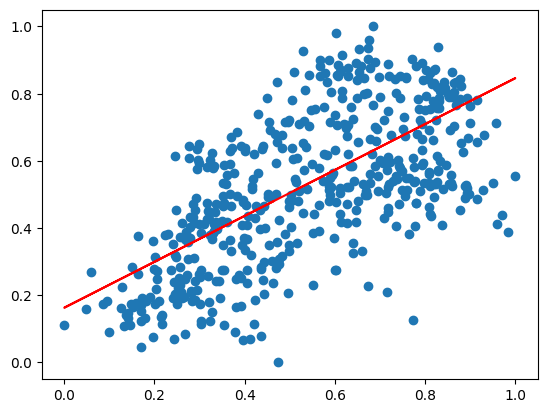

In [696]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.163 + 0.683*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [698]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           5.80e-61
Time:                        15:20:14   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

### Adding another variable¶

The R-squared value obtained is 0.414. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. yr.

In [701]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'yr']]

In [703]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.079628
temp     0.583559
yr       0.237213
dtype: float64

In [705]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          9.25e-130
Time:                        15:20:15   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.0

model have clearly improved the model as the value of adjusted R-squared as its value has gone up to 0.690 from 0.418. Let's go ahead and add another variable, windspeed.

In [708]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'yr','windspeed']]

In [710]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        0.157022
temp         0.555578
yr           0.238494
windspeed   -0.196438
dtype: float64

In [712]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     416.0
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          3.84e-136
Time:                        15:20:17   Log-Likelihood:                 355.52
No. Observations:                 510   AIC:                            -703.0
Df Residuals:                     506   BIC:                            -686.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1570      0.019      8.177      0.0

In [714]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'yr','windspeed','summer_season']]

In [716]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const            0.157894
temp             0.544141
yr               0.238572
windspeed       -0.210321
summer_season    0.039522
dtype: float64

In [718]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     320.0
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          6.38e-137
Time:                        15:20:18   Log-Likelihood:                 360.47
No. Observations:                 510   AIC:                            -710.9
Df Residuals:                     505   BIC:                            -689.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1579      0.019      8.294

 we can improved the adjusted R-squared again. But Now I will go ahead and add all the feature variables.

### Adding all the variables to the model

In [722]:
# Check all the columns of the dataframe

bikeSharing.columns

Index(['yr', 'holiday', 'weekday', 'workingday', 'temp', 'hum', 'windspeed',
       'cnt', 'light_weather', 'mist_weather', 'spring_season',
       'summer_season', 'winter_season', 'aug', 'jul', 'jun', 'may', 'sep'],
      dtype='object')

In [724]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const            0.242651
yr               0.230183
holiday         -0.077525
weekday          0.007505
workingday       0.016083
temp             0.535841
hum             -0.166046
windspeed       -0.180813
light_weather   -0.243842
mist_weather    -0.058537
spring_season   -0.052944
summer_season    0.054273
winter_season    0.103133
aug              0.004208
jul             -0.056578
jun             -0.021165
may              0.011143
sep              0.081309
dtype: float64

In [726]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     162.2
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          4.37e-189
Time:                        15:20:20   Log-Likelihood:                 519.86
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     492   BIC:                            -927.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2427      0.039      6.286

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [729]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [731]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,hum,30.43
4,temp,29.47
9,spring_season,6.05
11,winter_season,6.05
10,summer_season,5.97
6,windspeed,4.88
12,aug,4.64
13,jul,4.15
3,workingday,3.20
2,weekday,3.17


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

## Dropping the variable and updating the model


In [735]:
X = X_train.drop('hum', axis=1)

In [737]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [739]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.1
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          3.74e-186
Time:                        15:20:25   Log-Likelihood:                 510.14
No. Observations:                 510   AIC:                            -986.3
Df Residuals:                     493   BIC:                            -914.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1559      0.034      4.624

In [741]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,21.22
9,summer_season,4.86
5,windspeed,4.79
11,aug,4.49
12,jul,4.10
10,winter_season,3.84
8,spring_season,3.56
3,workingday,3.18
2,weekday,3.17
15,sep,2.69


noticed, dropping hum decreased the VIF of other fields as well . But from the summary, we can still see some of them have a high p-value. aug for instance, has a p-value of 0.791. We should drop this variable as well.

In [744]:
X = X.drop('aug', axis=1)

In [746]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [748]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.4
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          2.87e-187
Time:                        15:20:27   Log-Likelihood:                 510.10
No. Observations:                 510   AIC:                            -988.2
Df Residuals:                     494   BIC:                            -920.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1593      0.031      5.111

In [750]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,8.29
5,windspeed,4.79
3,workingday,3.18
2,weekday,3.13
9,summer_season,3.01
8,spring_season,2.43
0,yr,2.09
10,winter_season,1.96
13,may,1.79
11,jul,1.72


In [752]:
X = X.drop('temp', axis=1)

In [754]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [756]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     126.2
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          4.13e-153
Time:                        15:20:29   Log-Likelihood:                 425.88
No. Observations:                 510   AIC:                            -821.8
Df Residuals:                     495   BIC:                            -758.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5203      0.020     25.634

In [758]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,windspeed,4.21
8,summer_season,3.01
2,weekday,2.80
3,workingday,2.78
7,spring_season,2.31
9,winter_season,1.95
0,yr,1.91
12,may,1.67
6,mist_weather,1.56
10,jul,1.29


In [760]:
#droppong july columns as p value is higher for this column
X = X.drop('jul', axis=1)

In [762]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [764]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.1
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          3.65e-154
Time:                        15:20:30   Log-Likelihood:                 425.83
No. Observations:                 510   AIC:                            -823.7
Df Residuals:                     496   BIC:                            -764.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5233      0.018     29.032

In [766]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,windspeed,4.02
8,summer_season,2.78
2,weekday,2.72
3,workingday,2.69
7,spring_season,2.04
0,yr,1.87
9,winter_season,1.76
11,may,1.67
6,mist_weather,1.56
10,jun,1.27


In [768]:
#Dropping workingday as p value is high 0.060 
X = X.drop('workingday', axis=1)

In [770]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [772]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     146.4
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          1.72e-154
Time:                        15:20:32   Log-Likelihood:                 424.00
No. Observations:                 510   AIC:                            -822.0
Df Residuals:                     497   BIC:                            -767.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5379      0.016     32.980

In [774]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.86
7,summer_season,2.76
2,weekday,2.63
6,spring_season,2.00
0,yr,1.81
8,winter_season,1.71
10,may,1.66
5,mist_weather,1.55
9,jun,1.26
11,sep,1.17


Now, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [778]:
y_train_cnt = lr_4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

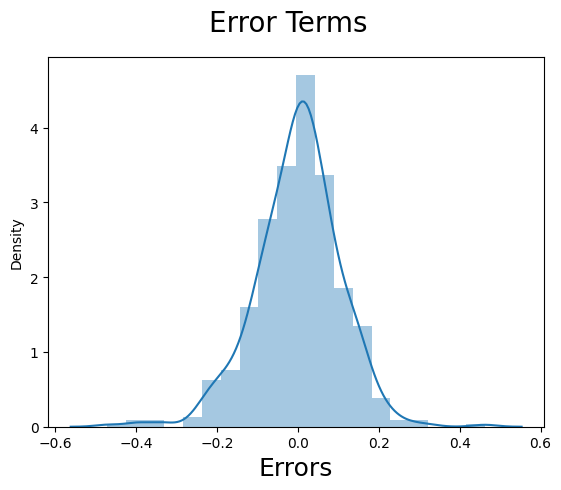

In [780]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [784]:
num_vars = ['yr', 'temp', 'hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [786]:
df_test.describe()

,yr,holiday,weekday,workingday,temp,hum,windspeed,cnt,light_weather,mist_weather,spring_season,summer_season,winter_season,aug,jul,jun,may,sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,3.018265,0.698630,0.558941,0.638508,0.313350,0.520592,0.027397,0.319635,0.255708,0.264840,0.232877,0.059361,0.105023,0.095890,0.086758,0.086758
std,0.500722,0.188034,1.988415,0.459904,0.233698,0.148974,0.159947,0.218435,0.163612,0.467403,0.437258,0.442259,0.423633,0.236840,0.307285,0.295115,0.282125,0.282125
min,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,5.000000,1.000000,0.759096,0.743928,0.403048,0.672745,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,6.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [789]:
y_test = df_test.pop('cnt')
X_test = df_test

In [791]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [793]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["hum","aug","temp","jul","workingday"], axis = 1)

In [795]:
# Making predictions using the fourth model
y_pred_m4 = lr_4.predict(X_test_m4)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

In [829]:
#evaluate
from sklearn.metrics import r2_score
r2_test=r2_score(y_true=y_test, y_pred=y_pred_m4)
r2_test

0.7618459676322326

In [843]:
y_train_pred=lr_4.predict(X_train_lm)
r2_train=r2_score(y_true=y_train, y_pred=y_train_pred)
r2_train

0.7794746304505213

0.7618459676322326 is the coefficient of determination, also known as R-squared

Text(0, 0.5, 'y_pred')

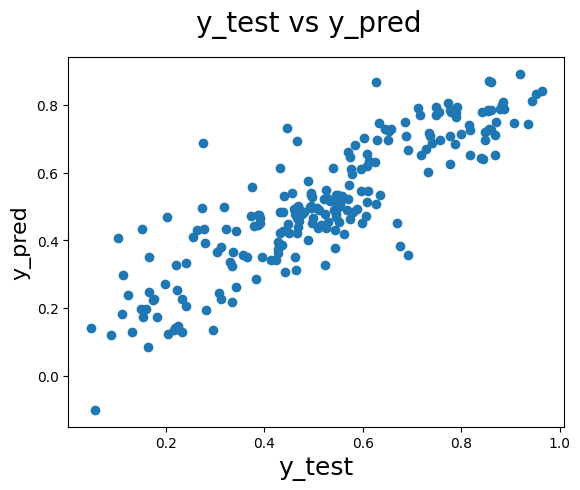

In [801]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    


We can see that the equation of our best fitted line is:

$ cnt = 0.2504  \times  yr + 0.0083  \times  weekday + 0.0790  \times  jun + 0.0839  \times  may + 0.0829  \times  sep - 0.1549 \times
 windspeed - 0.2930 \times light_weather - 0.0905 \times mist_weather  - 0.2879 \times spring_season - 0.0758 \times summer_season
 - 0.0632 \times winter_season  - 0.0861 \times holiday $


In [845]:
print("Train:",round(r2_train,3),"Test:",round(r2_test,3))

Train: 0.779 Test: 0.762


In [855]:
from sklearn import metrics
print('MAE:',round(metrics.mean_absolute_error(y_test,y_pred_m4),3))
print('MSE:',round(metrics.mean_squared_error(y_test,y_pred_m4),3))
print('RMSE:',round(np.sqrt(metrics.mean_squared_error(y_test,y_pred_m4))))

MAE: 0.082
MSE: 0.011
RMSE: 0
